<a href="https://colab.research.google.com/github/surajkumar-github/Image-Recognition-Using-CIFAR-10-Dataset-/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
#from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.utils import np_utils
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [3]:
from keras.datasets import cifar10

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
print('The size of the train data is{}'.format(x_train.shape))
print('The size of the test data is {}'.format(x_test.shape))

The size of the train data is(50000, 32, 32, 3)
The size of the test data is (10000, 32, 32, 3)


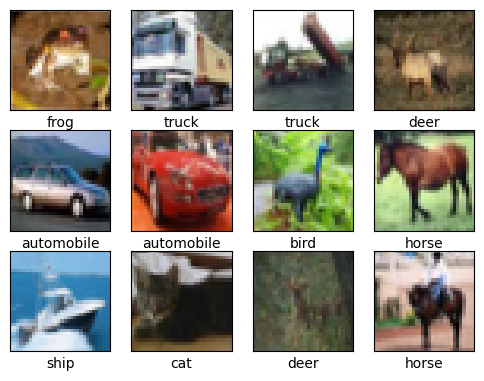

Total class 10


In [6]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plt.figure(figsize=(6,6))
for i in range(12):
  plt.subplot(4,4,1+i)
  plt.imshow(x_train[i])
  plt.grid=False
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_name[y_train[i][0]])
plt.show()
num_class = len(np.unique(y_train))
print('Total class {}'.format(num_class))

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [8]:
num_of_classes=len(set(y_train.flatten()))
print(num_of_classes)

10


In [9]:
batch_size=100
num_classes=10
epochs=10

In [10]:
model = Sequential([
layers.Conv2D(16,3, padding='same', input_shape=x_train.shape[1:],activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32,3, padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64,3, padding='same', input_shape=x_train.shape[1:],activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(128,3, padding='same',activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(256,activation='relu'),
layers.Dense(num_of_classes),
layers.Activation('softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,338 (903.66 KB)

 Trainable params: 231,338 (903.66 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle='True')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3389 - loss: 1.7779 - val_accuracy: 0.5290 - val_loss: 1.2927
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5500 - loss: 1.2502 - val_accuracy: 0.6210 - val_loss: 1.0700
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6327 - loss: 1.0320 - val_accuracy: 0.6589 - val_loss: 0.9784
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6850 - loss: 0.8911 - val_accuracy: 0.6885 - val_loss: 0.8917
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7268 - loss: 0.7867 - val_accuracy: 0.6979 - val_loss: 0.8734
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7533 - loss: 0.7129 - val_accuracy: 0.7160 - val_loss: 0.8197
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7759 - loss: 0.6405 - val_accuracy: 0.7167 - val_loss: 0.8264
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7967 - loss: 0.5833 - val_accuracy: 0.7175 - val

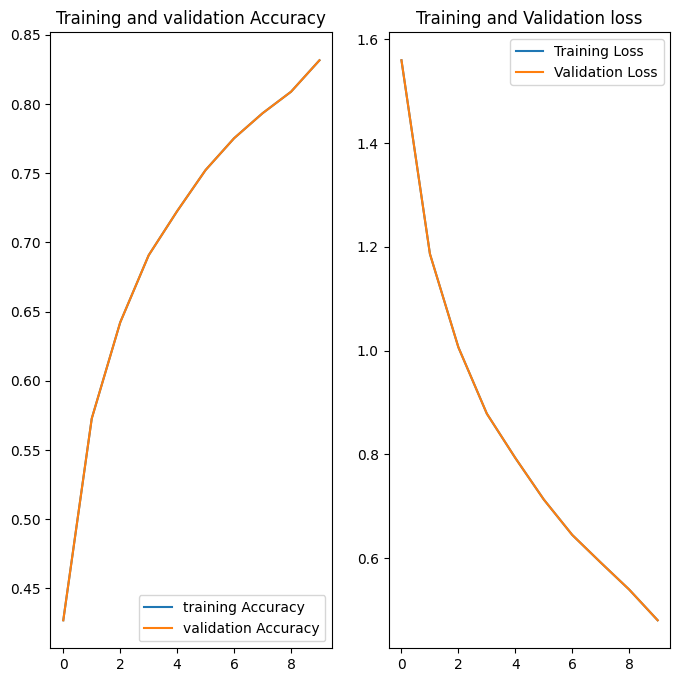

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='training Accuracy')
plt.plot(epochs_range, acc, label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

In [15]:
loss, accuracy =model.evaluate(x_test, y_test)
print('Test Accuracy =', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7355 - loss: 0.8133
Test Accuracy = 0.732200026512146


In [16]:
img_height=32
img_width=32

285304/285304 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
this image likely belongs to cat with a23.20 percent confidence.
image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

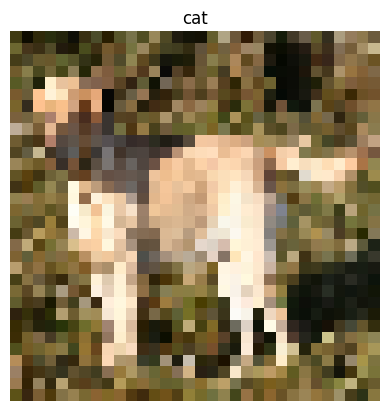

In [17]:
dog_url="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Labrador_on_Quantock_%282175262184%29.jpg/1200px-Labrador_on_Quantock_%282175262184%29.jpg"
dog_path=tf.keras.utils.get_file('', origin=dog_url)

img = keras.preprocessing.image.load_img(
    dog_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "this image likely belongs to {} with a{:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100* np.max(score))
)
print('image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_name[np.argmax(score)])
plt.axis("off")

296658/296658 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
this image likely belongs to ship with a23.20 percent confidence.
image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

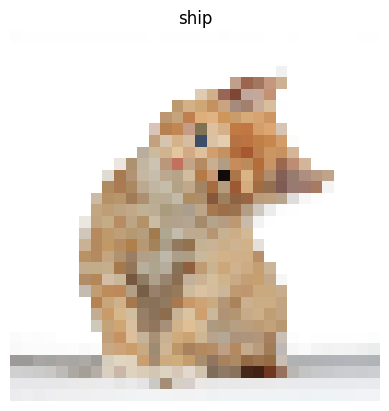

In [18]:
cat_url="https://i.pinimg.com/originals/af/7d/5a/af7d5a9717ed7e0a8a43e26165d0b4a8.png"
cat_path=tf.keras.utils.get_file('', origin=cat_url)

img = keras.preprocessing.image.load_img(
    cat_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "this image likely belongs to {} with a{:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100* np.max(score))
)
print('image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_name[np.argmax(score)])
plt.axis("off")

50370/50370 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
this image likely belongs to airplane with a23.20 percent confidence.
image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

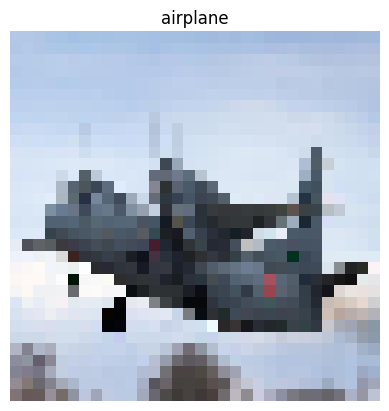

In [19]:
airplane_url="https://s02.sgp1.cdn.digitaloceanspaces.com/article/121172-hezhgkpyzq-1560062383.jpg"
airplane_path=tf.keras.utils.get_file('', origin=airplane_url)

img = keras.preprocessing.image.load_img(
    airplane_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "this image likely belongs to {} with a{:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100* np.max(score))
)
print('image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_name[np.argmax(score)])
plt.axis("off")

146380/146380 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
this image likely belongs to ship with a23.20 percent confidence.
image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

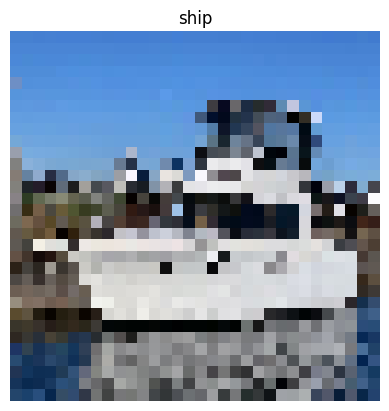

In [20]:
ship_url="https://d385tlrw8quush.cloudfront.net/1024/768/276063_762b00126f84686561769f5ac798c71b.jpg"
ship_path=tf.keras.utils.get_file('', origin=ship_url)

img = keras.preprocessing.image.load_img(
    ship_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "this image likely belongs to {} with a{:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100* np.max(score))
)
print('image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_name[np.argmax(score)])
plt.axis("off")

72882/72882 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
this image likely belongs to truck with a23.20 percent confidence.
image after resizing to 32*32


(-0.5, 31.5, 31.5, -0.5)

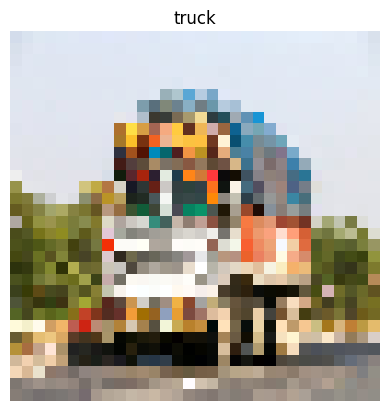

In [26]:
dog_url="https://t3.ftcdn.net/jpg/04/92/39/74/360_F_492397454_2QniwEAC2qKa007ntMRzK6WbDGguY2Wh.jpg"
dog_path=tf.keras.utils.get_file('', origin=dog_url)

img = keras.preprocessing.image.load_img(
    dog_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "this image likely belongs to {} with a{:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100* np.max(score))
)
print('image after resizing to 32*32')
px=plt.subplot()
plt.imshow(img)
px.set_title(class_name[np.argmax(score)])
plt.axis("off")